In [162]:
import numpy as np

In [163]:
def random_walk_td(num_episodes, alpha, gamma):
    num_states = 5  # Number of states (excluding terminal states)
    states = list(range(1, num_states + 1))
    terminal_states = [0, num_states + 1]

    # Initialize value function
    V = np.zeros(num_states + 2)

    for episode in range(num_episodes):
        # Initialize starting state
        current_state = 3  # Starting from the middle state

        while current_state not in terminal_states:
            # Take a random action (left or right)
            action = np.random.choice([-1, 1])
            
            # Update the next state based on the action
            next_state = current_state + action
            
            # Reward is 0 except when reaching the terminal states
            reward = 0 if next_state!=6 else 1 if next_state == num_states + 1 else -1
            
            # Temporal Difference update
            V[current_state] += alpha * (reward + gamma * V[next_state] - V[current_state])
            
            # Move to the next state
            current_state = next_state

    return V[1:num_states + 1]



In [164]:
state_labels = ['A', 'B', 'C', 'D', 'E']

In [165]:
# Run the random walk with temporal difference
num_episodes = 100
alpha = 0.1
gamma = 1
values = random_walk_td(num_episodes, alpha, gamma)
alpha = 0.01
values2 = random_walk_td(num_episodes, alpha, gamma)
alpha = 0.05
values3 = random_walk_td(num_episodes, alpha, gamma)
alpha = 0.15
values4 = random_walk_td(num_episodes, alpha, gamma)


/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

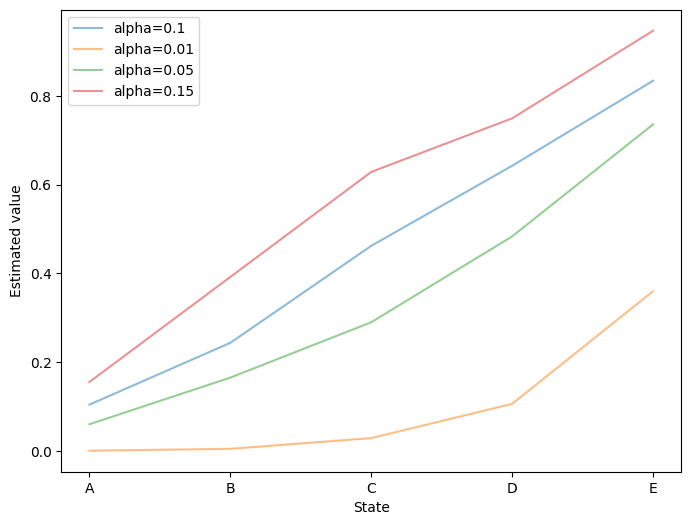

In [166]:
plt.figure(figsize=(8, 6))

plt.plot(state_labels, values, label='alpha=0.1', alpha=0.5)  
plt.plot(state_labels, values2, label='alpha=0.01', alpha=0.5)
plt.plot(state_labels, values3, label='alpha=0.05', alpha=0.5)
plt.plot(state_labels, values4, label='alpha=0.15', alpha=0.5)

plt.xlabel('State')
plt.ylabel('Estimated value')
plt.legend()

plt.show()